In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "/Users/jbeiting/Desktop/CS_539/Team_assignment_4"]).decode("utf8"))

Bagged_Tree_MNIST.ipynb
Classification_Tree_MNIST.ipynb
MNIST_RandomForest.ipynb
mnist_clf.csv
mnist_rf.csv
test.csv
train.csv



In [10]:
train = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Team_assignment_4/train.csv')
test = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Team_assignment_4/test.csv')

In [11]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [12]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_x = train.iloc[:,1:]
df_y = train.iloc[:,0]

In [14]:
def print_image(row, df):
    temp = df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

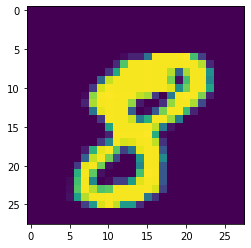

In [15]:
print_image(10, df_x)

In [16]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 100)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (33600, 784)
X_test shape:  (8400, 784)


In [18]:
#Decision Tree Classifier as Base learner in Bagging Classifier
bgc = BaggingClassifier(oob_score = True, n_jobs = -1, n_estimators = 20,
                        random_state = 400, base_estimator = DecisionTreeClassifier())

In [20]:
bgc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  n_jobs=-1, oob_score=True, random_state=400)

In [21]:
pred = bgc.predict(X_test)
print("Classification Report: \n", classification_report(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       845
           1       0.97      0.97      0.97       920
           2       0.92      0.94      0.93       801
           3       0.92      0.94      0.93       823
           4       0.93      0.92      0.93       795
           5       0.93      0.92      0.93       807
           6       0.96      0.95      0.96       840
           7       0.95      0.94      0.95       869
           8       0.91      0.91      0.91       843
           9       0.92      0.91      0.91       857

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400

Confusion Matrix: 
 [[823   0   2   5   3   4   2   2   3   1]
 [  0 896  10   4   3   1   1   2   2   1]
 [  5   2 756   4   4   3   1  10  14   2]
 [  3   2  11 770   0  12   0   4  16   5]
 [  1   3   7   1 734   

In [22]:
# Cross validation
bgc.fit(df_x, df_y)
score = cross_val_score(bgc, df_x, df_y)
print('Score: ', np.mean(score))

Score:  0.9404999999999999


In [23]:
pred = pd.Series(pred,name = "Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_bgc.csv", index = False)